# Linear Regression

## 1. Basic

### 1.1 Linear Regression Đơn Giản

In [5]:
import pandas as pd

data = {
    'hours_studied': [2, 3, 4, 5, 6],
    'scores': [50, 60, 65, 70, 80]
}

df = pd.DataFrame(data)
df

,hours_studied,scores
0,2,50
1,3,60
2,4,65
3,5,70
4,6,80


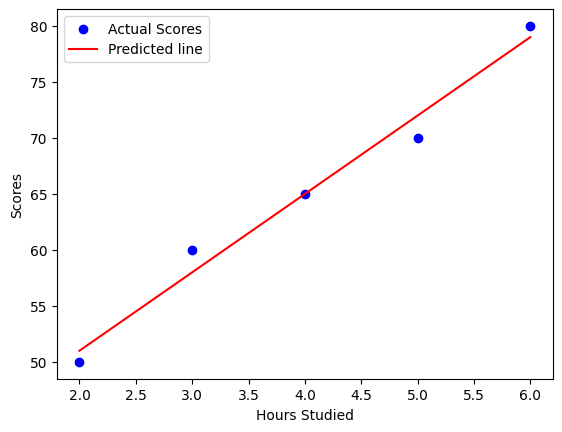

Coefficient (slope): [7.]
Intercept: [37.]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Tạo mô hình Linear Regression
model = LinearRegression()

# Chia dữ liệu thành biến độc lập và phụ thuộc
X = df[['hours_studied']].values
y = df[['scores']].values

# Huấn luyện mô hình
model.fit(X, y)

# Dự đoán
predictions = model.predict(X)

# Vẽ đồ thị
plt.scatter(X, y, color="blue", label="Actual Scores")
plt.plot(X, predictions, color="red", label="Predicted line")
plt.xlabel('Hours Studied')
plt.ylabel("Scores")
plt.legend()
plt.show()

print(f"Coefficient (slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

## 1.2 Multiple Linear Regression
### Mục tiêu: Dự đoán điểm thi dựa trên số giờ học và số giờ ngủ.

In [11]:
data = {
    'hours_studied': [2, 3, 4, 5, 6],
    'hours_slept': [6, 5, 7, 8, 5],
    'scores': [50, 60, 65, 70, 80]
}

df = pd.DataFrame(data)
df

,hours_studied,hours_slept,scores
0,2,6,50
1,3,5,60
2,4,7,65
3,5,8,70
4,6,5,80


In [12]:
# Tạo mô hình Multiple Linear Regression
model = LinearRegression()

# Chia dữ liệu thành biến độc lập và phụ thuộc
X = df[['hours_studied', 'hours_slept']].values
y = df['scores'].values

# Huấn luyện mô hình
model.fit(X, y)

# Dự đoán
predictions = model.predict(X)

# In hệ số
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [ 7.10447761 -1.04477612]
Intercept: 43.05970149253729


## 1.3 Polynomial Regression
### Mục tiêu: Dự đoán điểm thi dựa trên số giờ học với mô hình phi tuyến.

In [14]:
data = {
    'hours_studied': [1, 2, 3, 4, 5, 6, 7, 8],
    'scores': [20, 30, 50, 65, 70, 75, 85, 90]
}

df = pd.DataFrame(data)
df

,hours_studied,scores
0,1,20
1,2,30
2,3,50
3,4,65
4,5,70
5,6,75
6,7,85
7,8,90


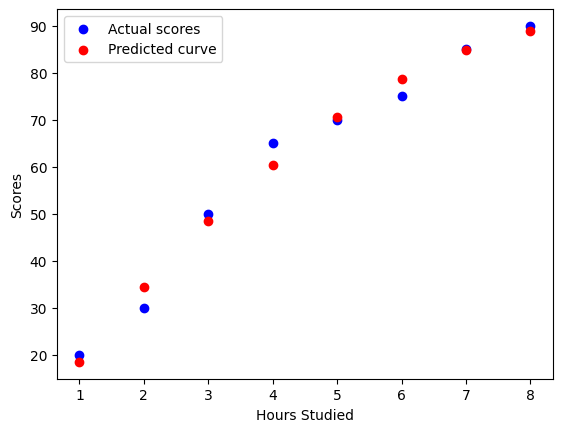

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Tạo mô hình Polynomial Regression với bậc 2
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Chia dữ liệu thành biến độc lập và phụ thuộc
X = df[['hours_studied']].values
y = df['scores'].values

# Huấn luyện mô hình
model.fit(X, y)

# Dự đoán
predictions = model.predict(X)

# Vẽ đồ thị
plt.scatter(X, y, color='blue', label='Actual scores')
plt.scatter(X, predictions, color='red', label='Predicted curve')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.legend()
plt.show()

## 1.4 Lasso và Ridge Regression
### Mục tiêu: Sử dụng Lasso và Ridge để giảm thiểu overfitting

In [16]:
data = {
    'hours_studied': [2, 3, 4, 5, 6, 7],
    'hours_slept': [6, 5, 7, 8, 5, 6],
    'scores': [50, 60, 65, 70, 80, 90]
}

df = pd.DataFrame(data)
df

,hours_studied,hours_slept,scores
0,2,6,50
1,3,5,60
2,4,7,65
3,5,8,70
4,6,5,80
5,7,6,90


In [17]:
from sklearn.linear_model import Lasso, Ridge

# Chia dữ liệu thành biến độc lập và phụ thuộc
X = df[['hours_studied', 'hours_slept']].values
y = df['scores'].values

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X, y)
print(f"Lasso Coefficients: {lasso_model.coef_}")

# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X, y)
print(f"Ridge Coefficients: {ridge_model.coef_}")

Lasso Coefficients: [ 7.56787696 -1.07569831]
Ridge Coefficients: [ 7.56097227 -1.14622396]
